## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

## **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [570]:
# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

## Loading the dataset

In [571]:
churn = pd.read_csv("BankChurners.csv")

<IPython.core.display.Javascript object>

## Data Overview

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [572]:
# Checking the number of rows and columns in the training data
churn.shape 

(10127, 21)

<IPython.core.display.Javascript object>

In [573]:
# let's create a copy of the data
data = churn.copy()

<IPython.core.display.Javascript object>

### Displaying the first few rows of the dataset

In [574]:
# let's view the first 5 rows of the data
data.head() 

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


<IPython.core.display.Javascript object>

In [575]:
# let's view the last 5 rows of the data
data.tail() 

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


<IPython.core.display.Javascript object>

### Checking the data types of the columns for the dataset

In [576]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

<IPython.core.display.Javascript object>

### Checking for duplicate values

In [577]:
# let's check for duplicate values in the data
data.duplicated().sum() 

0

<IPython.core.display.Javascript object>

### Checking for missing values

In [578]:
# let's check for missing values in the data
data.isnull().sum() 

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

<IPython.core.display.Javascript object>

### Statistical summary of the dataset

In [579]:
# let's view the statistical summary of the numerical columns in the data
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000
mean,739177606.334,46.326,2.346,35.928,3.813,2.341,2.455,8631.954,1162.814,7469.140,0.760,4404.086,64.859,0.712,0.275
std,36903783.450,8.017,1.299,7.986,1.554,1.011,1.106,9088.777,814.987,9090.685,0.219,3397.129,23.473,0.238,0.276
min,708082083.000,26.000,0.000,13.000,1.000,0.000,0.000,1438.300,0.000,3.000,0.000,510.000,10.000,0.000,0.000
25%,713036770.500,41.000,1.000,31.000,3.000,2.000,2.000,2555.000,359.000,1324.500,0.631,2155.500,45.000,0.582,0.023
50%,717926358.000,46.000,2.000,36.000,4.000,2.000,2.000,4549.000,1276.000,3474.000,0.736,3899.000,67.000,0.702,0.176
75%,773143533.000,52.000,3.000,40.000,5.000,3.000,3.000,11067.500,1784.000,9859.000,0.859,4741.000,81.000,0.818,0.503
max,828343083.000,73.000,5.000,56.000,6.000,6.000,6.000,34516.000,2517.000,34516.000,3.397,18484.000,139.000,3.714,0.999


<IPython.core.display.Javascript object>

In [580]:
data.describe(include=["object"]).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


<IPython.core.display.Javascript object>

In [581]:
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Attrition_Flag are :
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
**************************************************
Unique values in Gender are :
F    5358
M    4769
Name: Gender, dtype: int64
**************************************************
Unique values in Education_Level are :
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
**************************************************
Unique values in Marital_Status are :
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
**************************************************
Unique values in Income_Category are :
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
**************************************************

<IPython.core.display.Javascript object>

In [582]:
# CLIENTNUM consists of uniques ID for clients and hence will not add value to the modeling
data.drop(["CLIENTNUM"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [583]:
## Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
data["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
data["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

<IPython.core.display.Javascript object>

## Exploratory Data Analysis

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [584]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [585]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [586]:
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

In [587]:
### Function to plot distributions
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

### Univariate analysis

`Customer_Age`

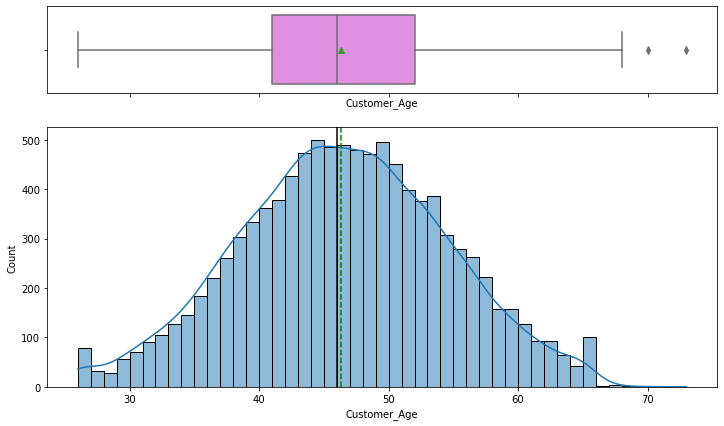

<IPython.core.display.Javascript object>

In [588]:
histogram_boxplot(data, "Customer_Age", kde=True)

`Months_on_book`

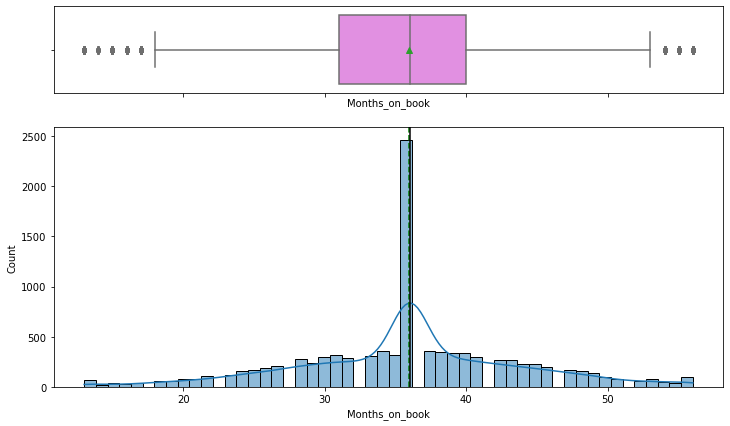

<IPython.core.display.Javascript object>

In [589]:
histogram_boxplot(data, 'Months_on_book', kde=True)

`Credit_Limit`

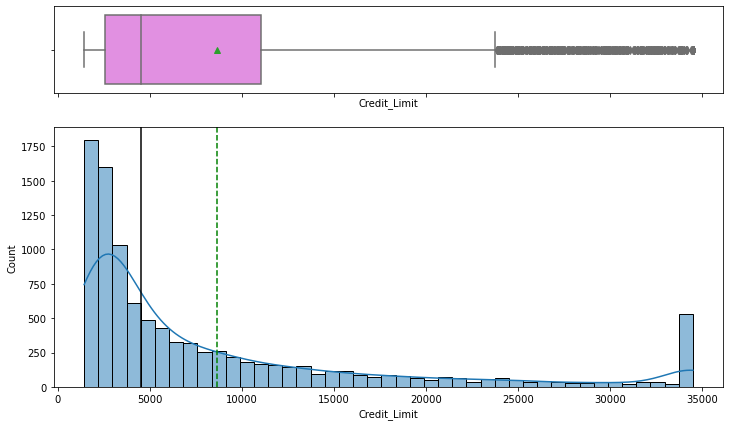

<IPython.core.display.Javascript object>

In [590]:
histogram_boxplot(data, 'Credit_Limit', kde=True)

`Total_Revolving_Bal`

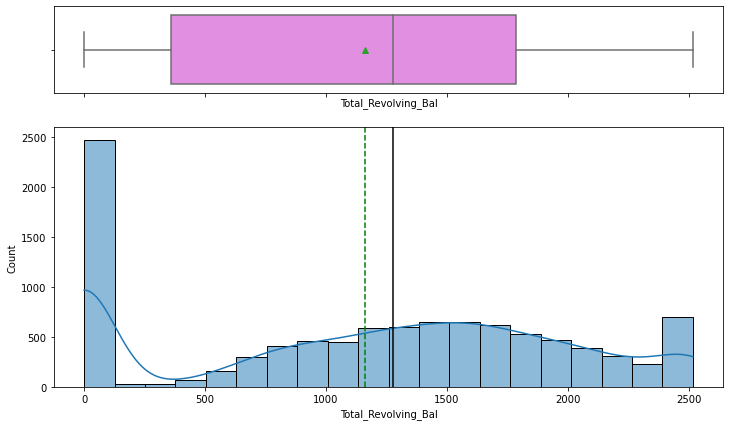

<IPython.core.display.Javascript object>

In [591]:
histogram_boxplot(data, 'Total_Revolving_Bal', kde=True)

`Avg_Open_To_Buy`

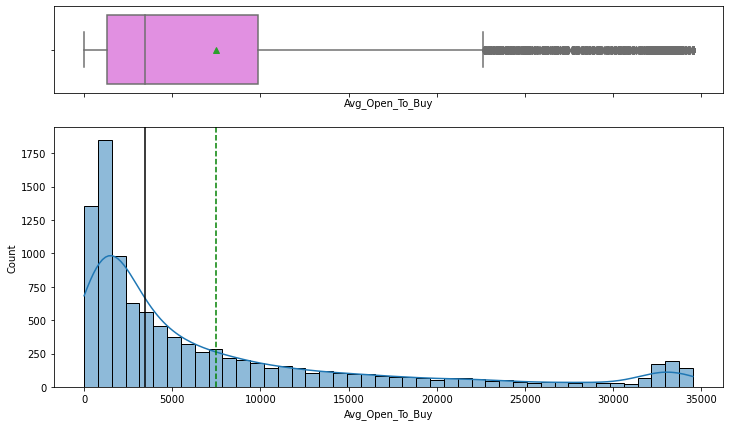

<IPython.core.display.Javascript object>

In [592]:
histogram_boxplot(data, 'Avg_Open_To_Buy', kde=True)

`Total_Trans_Ct`

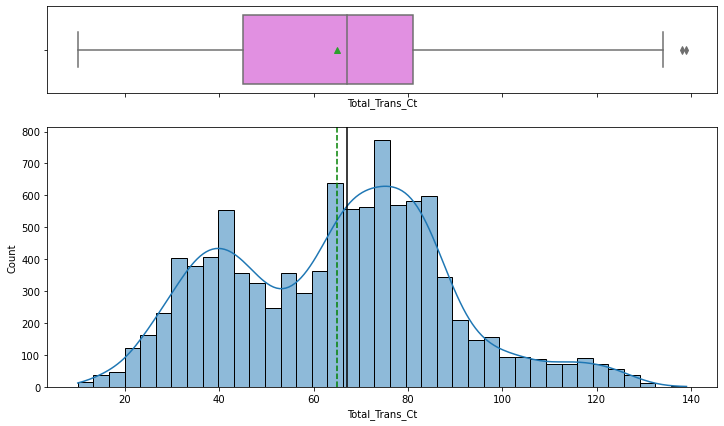

<IPython.core.display.Javascript object>

In [593]:
histogram_boxplot(data, 'Total_Trans_Ct', kde=True)

`Total_Amt_Chng_Q4_Q1`

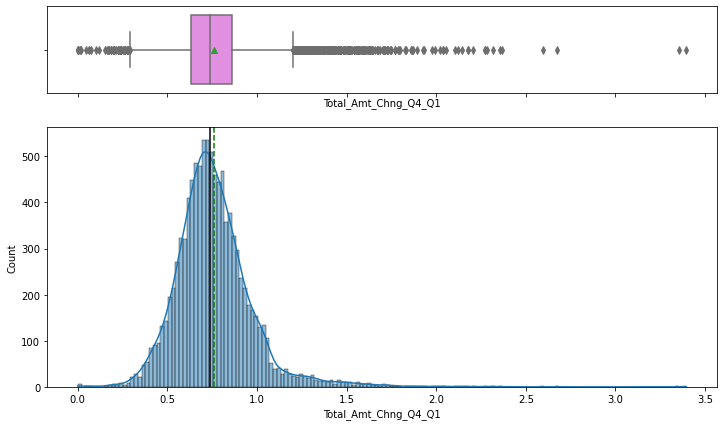

<IPython.core.display.Javascript object>

In [594]:
histogram_boxplot(data, 'Total_Amt_Chng_Q4_Q1', kde=True)

**Let's see total transaction amount distributed**

`Total_Trans_Amt`

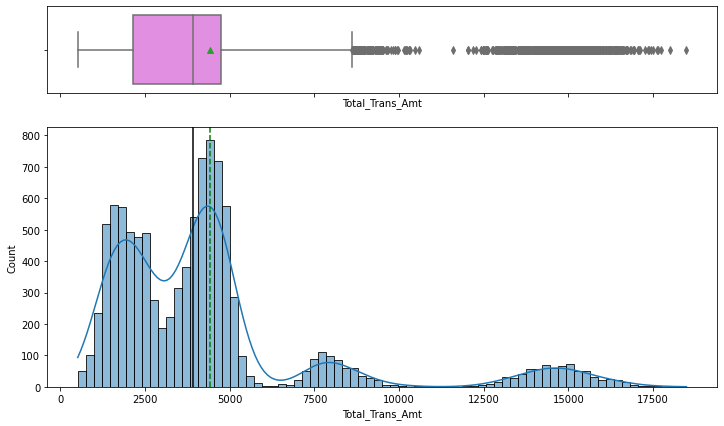

<IPython.core.display.Javascript object>

In [595]:
histogram_boxplot(data, 'Total_Trans_Amt', kde=True)

`Total_Ct_Chng_Q4_Q1`

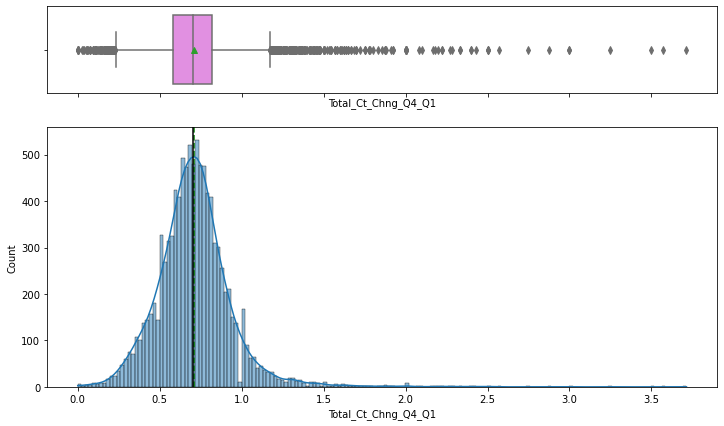

<IPython.core.display.Javascript object>

In [596]:
histogram_boxplot(data, 'Total_Ct_Chng_Q4_Q1', kde=True)

`Avg_Utilization_Ratio`

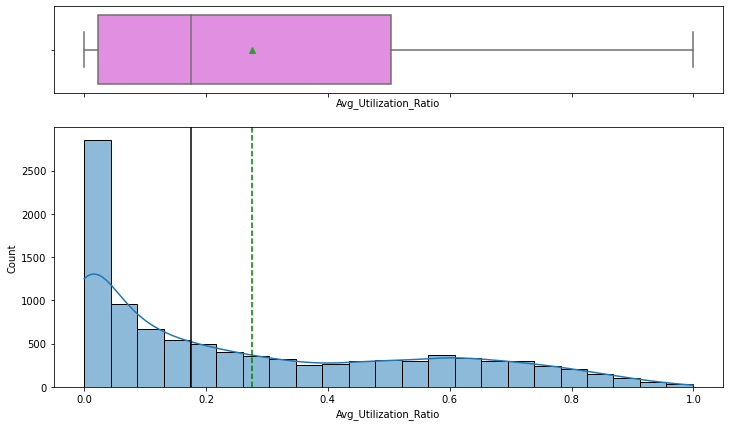

<IPython.core.display.Javascript object>

In [597]:
histogram_boxplot(data, 'Avg_Utilization_Ratio', kde=True)

`Dependent_count`

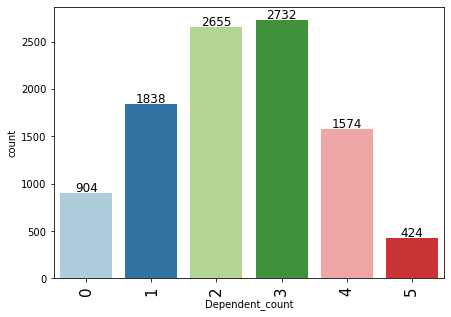

<IPython.core.display.Javascript object>

In [598]:
labeled_barplot(data, "Dependent_count")

`Total_Relationship_Count`

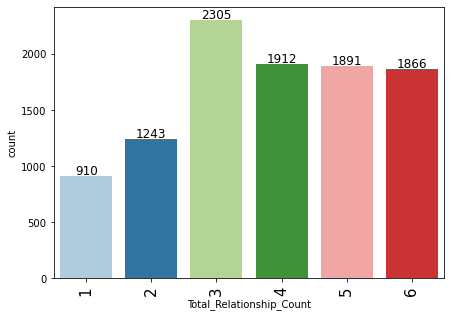

<IPython.core.display.Javascript object>

In [599]:
labeled_barplot(data, 'Total_Relationship_Count')

`Months_Inactive_12_mon`

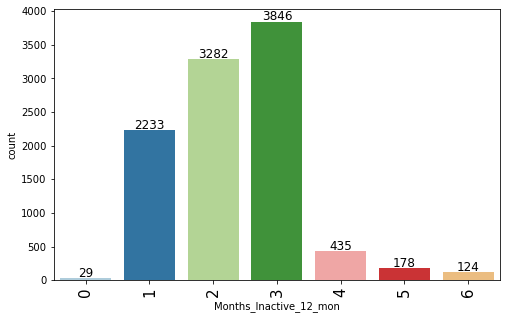

<IPython.core.display.Javascript object>

In [600]:
labeled_barplot(data, 'Months_Inactive_12_mon')

`Contacts_Count_12_mon`

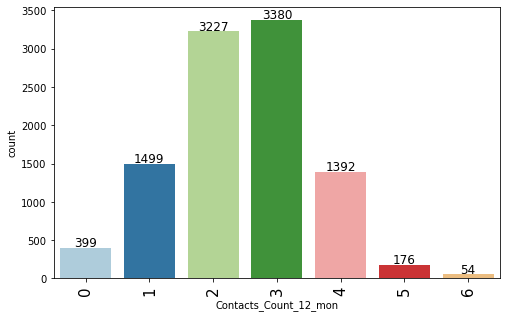

<IPython.core.display.Javascript object>

In [601]:
labeled_barplot(data, 'Contacts_Count_12_mon')

`Gender`

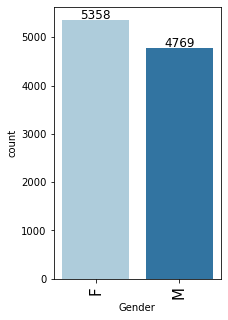

<IPython.core.display.Javascript object>

In [602]:
labeled_barplot(data, 'Gender')

`Education_Level`

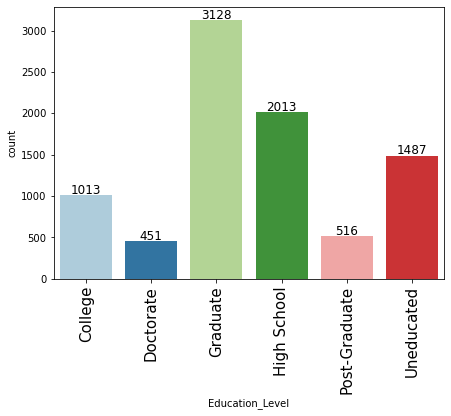

<IPython.core.display.Javascript object>

In [603]:
labeled_barplot(data, 'Education_Level')

`Marital_Status`

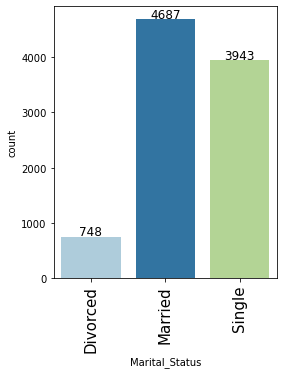

<IPython.core.display.Javascript object>

In [604]:
labeled_barplot(data, 'Marital_Status')

`Income_Category`

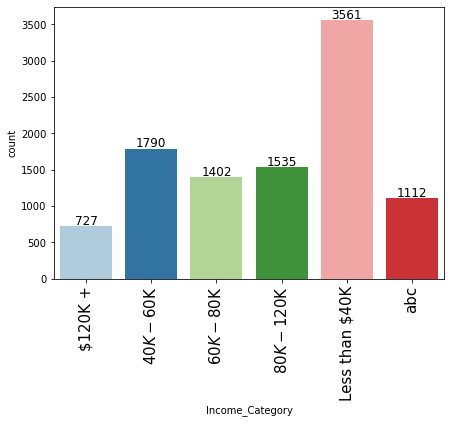

<IPython.core.display.Javascript object>

In [605]:
labeled_barplot(data, 'Income_Category')

`Card_Category`

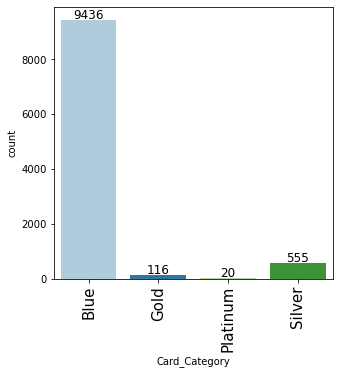

<IPython.core.display.Javascript object>

In [606]:
labeled_barplot(data, 'Card_Category')

`Attrition_Flag`

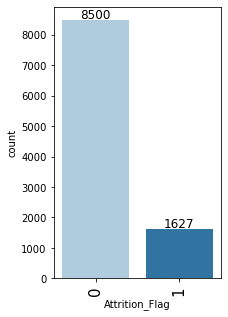

<IPython.core.display.Javascript object>

In [607]:
labeled_barplot(data, 'Attrition_Flag')

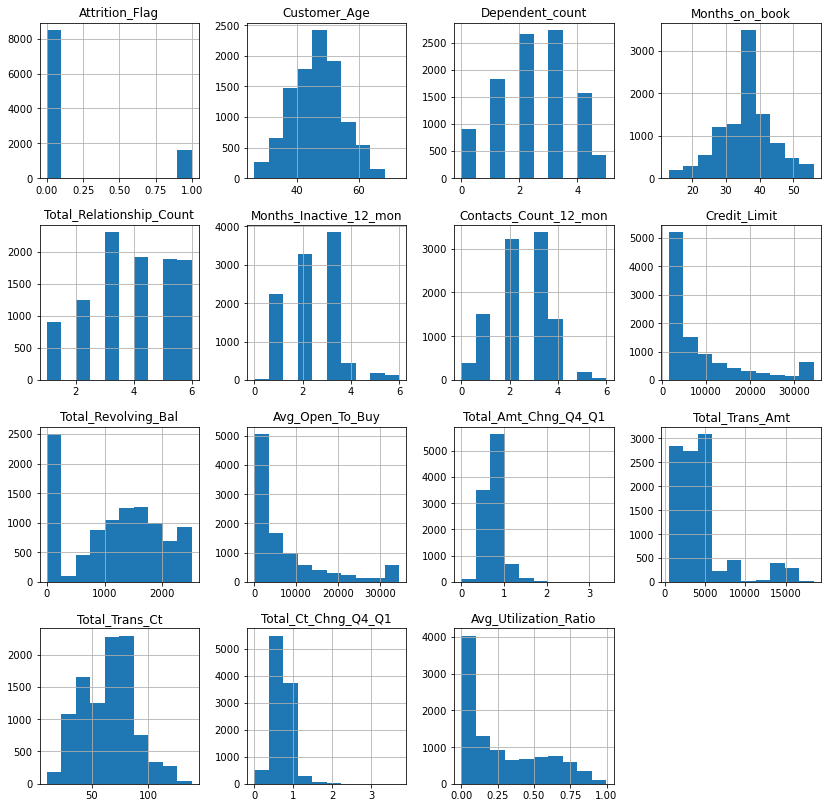

<IPython.core.display.Javascript object>

In [608]:
# creating histograms
data.hist(figsize=(14, 14))
plt.show()

### Bivariate Distributions

**Let's see the attributes that have a strong correlation with each other**

**Correlation Check**

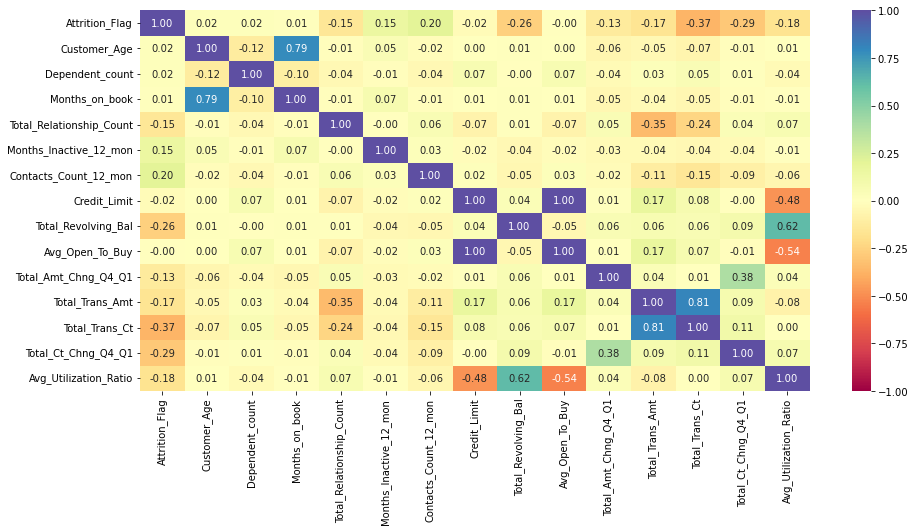

<IPython.core.display.Javascript object>

In [609]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

`Attrition_Flag vs Gender`

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


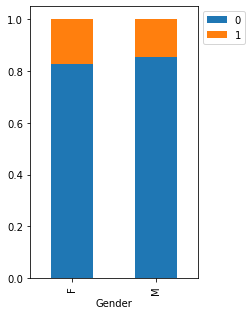

<IPython.core.display.Javascript object>

In [610]:
stacked_barplot(data, "Gender", "Attrition_Flag")

`Attrition_Flag vs Marital_Status`

Attrition_Flag     0     1   All
Marital_Status                  
All             7880  1498  9378
Married         3978   709  4687
Single          3275   668  3943
Divorced         627   121   748
------------------------------------------------------------------------------------------------------------------------


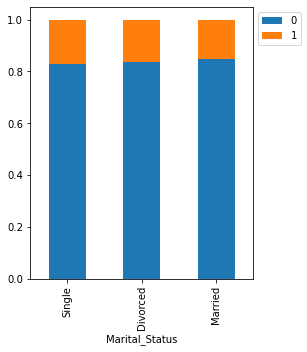

<IPython.core.display.Javascript object>

In [611]:
stacked_barplot(data, 'Marital_Status', 'Attrition_Flag')

`Attrition_Flag vs Education_Level`

Attrition_Flag      0     1   All
Education_Level                  
All              7237  1371  8608
Graduate         2641   487  3128
High School      1707   306  2013
Uneducated       1250   237  1487
College           859   154  1013
Doctorate         356    95   451
Post-Graduate     424    92   516
------------------------------------------------------------------------------------------------------------------------


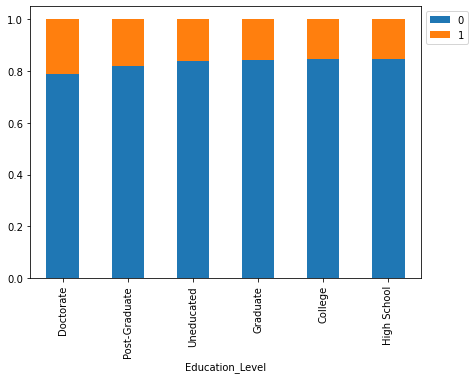

<IPython.core.display.Javascript object>

In [612]:
stacked_barplot(data, 'Education_Level', 'Attrition_Flag')

`Attrition_Flag vs Income_Category`

Attrition_Flag      0     1    All
Income_Category                   
All              8500  1627  10127
Less than $40K   2949   612   3561
$40K - $60K      1519   271   1790
$80K - $120K     1293   242   1535
$60K - $80K      1213   189   1402
abc               925   187   1112
$120K +           601   126    727
------------------------------------------------------------------------------------------------------------------------


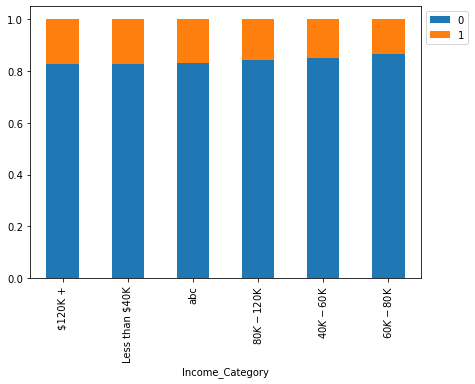

<IPython.core.display.Javascript object>

In [613]:
stacked_barplot(data, 'Income_Category', 'Attrition_Flag')

`Attrition_Flag vs Contacts_Count_12_mon`

Attrition_Flag            0     1    All
Contacts_Count_12_mon                   
All                    8500  1627  10127
3                      2699   681   3380
2                      2824   403   3227
4                      1077   315   1392
1                      1391   108   1499
5                       117    59    176
6                         0    54     54
0                       392     7    399
------------------------------------------------------------------------------------------------------------------------


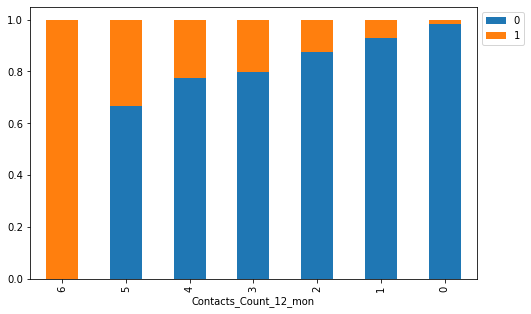

<IPython.core.display.Javascript object>

In [614]:
stacked_barplot(data, 'Contacts_Count_12_mon', 'Attrition_Flag')

**Let's see the number of months a customer was inactive in the last 12 months (Months_Inactive_12_mon) vary by the customer's account status (Attrition_Flag)**

`Attrition_Flag vs Months_Inactive_12_mon`

Attrition_Flag             0     1    All
Months_Inactive_12_mon                   
All                     8500  1627  10127
3                       3020   826   3846
2                       2777   505   3282
4                        305   130    435
1                       2133   100   2233
5                        146    32    178
6                        105    19    124
0                         14    15     29
------------------------------------------------------------------------------------------------------------------------


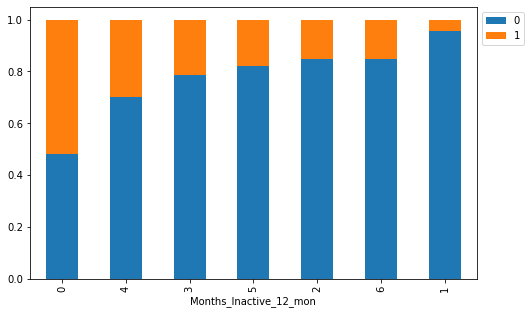

<IPython.core.display.Javascript object>

In [615]:
stacked_barplot(data, 'Months_Inactive_12_mon', 'Attrition_Flag')

`Attrition_Flag vs Total_Relationship_Count`

Attrition_Flag               0     1    All
Total_Relationship_Count                   
All                       8500  1627  10127
3                         1905   400   2305
2                          897   346   1243
1                          677   233    910
5                         1664   227   1891
4                         1687   225   1912
6                         1670   196   1866
------------------------------------------------------------------------------------------------------------------------


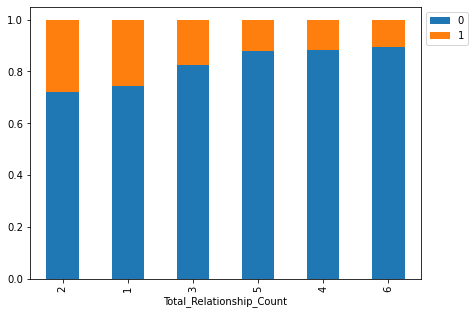

<IPython.core.display.Javascript object>

In [616]:
stacked_barplot(data, 'Total_Relationship_Count', 'Attrition_Flag')

`Attrition_Flag vs Dependent_count`

Attrition_Flag      0     1    All
Dependent_count                   
All              8500  1627  10127
3                2250   482   2732
2                2238   417   2655
1                1569   269   1838
4                1314   260   1574
0                 769   135    904
5                 360    64    424
------------------------------------------------------------------------------------------------------------------------


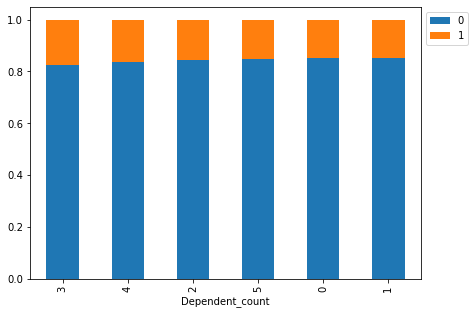

<IPython.core.display.Javascript object>

In [617]:
stacked_barplot(data, 'Dependent_count', 'Attrition_Flag')

`Total_Revolving_Bal` vs `Attrition_Flag`

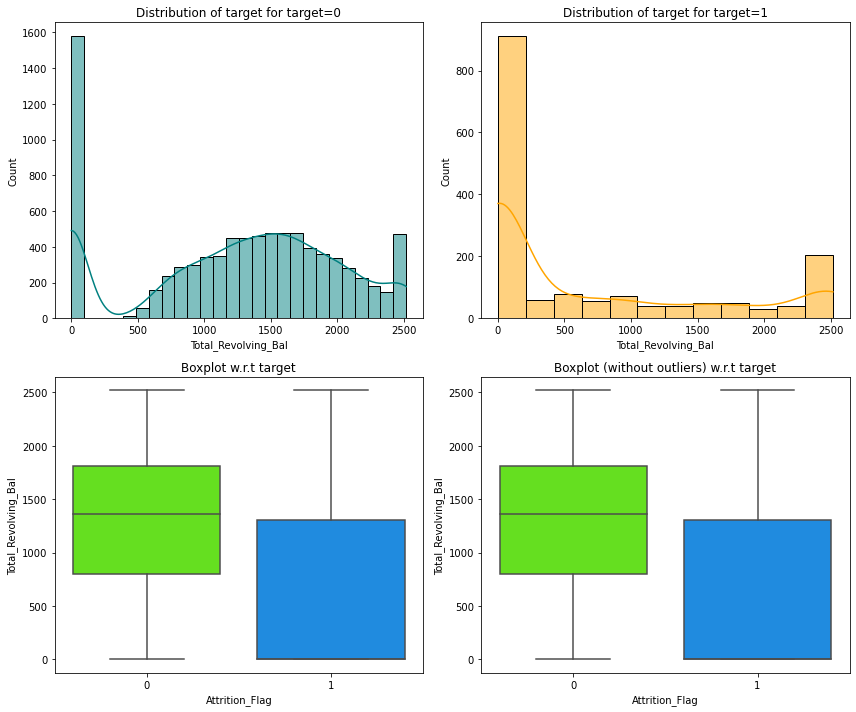

<IPython.core.display.Javascript object>

In [618]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")

`Attrition_Flag vs Credit_Limit`

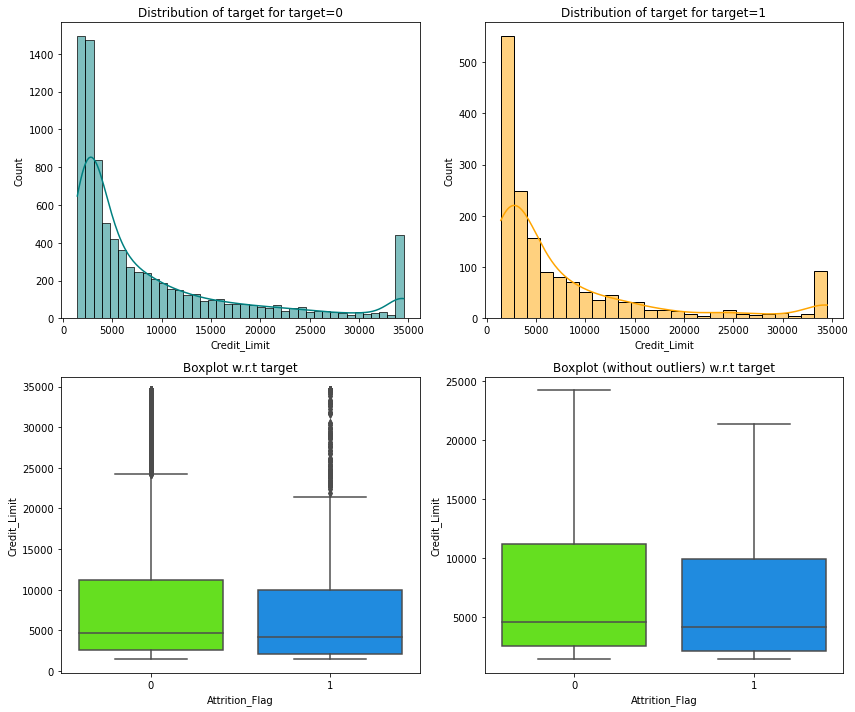

<IPython.core.display.Javascript object>

In [619]:
distribution_plot_wrt_target(data, 'Credit_Limit', 'Attrition_Flag')

`Attrition_Flag vs Customer_Age`

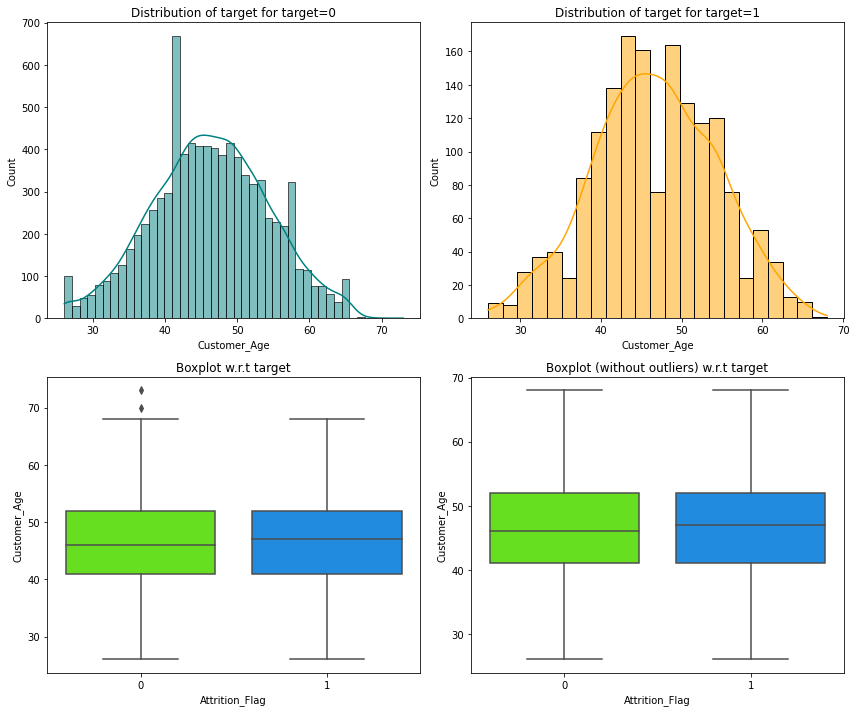

<IPython.core.display.Javascript object>

In [620]:
distribution_plot_wrt_target(data, 'Customer_Age', 'Attrition_Flag')

`Total_Trans_Ct` vs `Attrition_Flag`

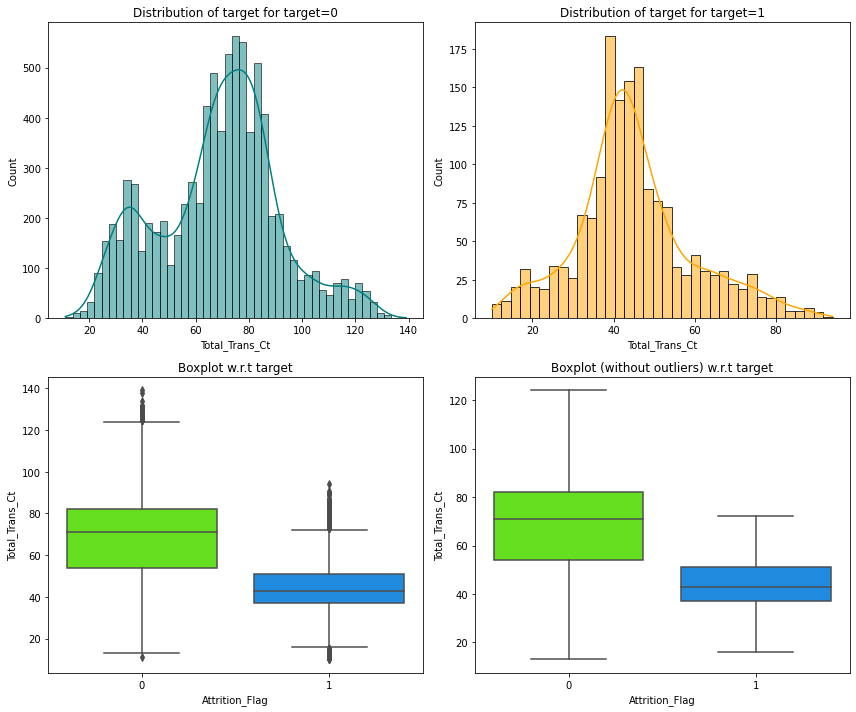

<IPython.core.display.Javascript object>

In [621]:
distribution_plot_wrt_target(data, 'Total_Trans_Ct', 'Attrition_Flag')

`Total_Trans_Amt` vs `Attrition_Flag`

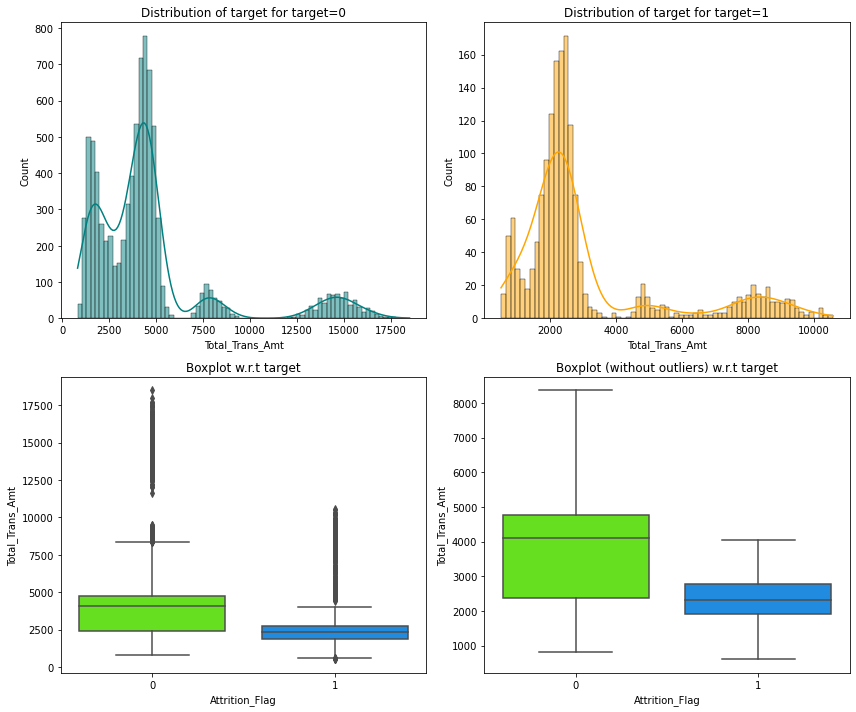

<IPython.core.display.Javascript object>

In [622]:
distribution_plot_wrt_target(data, 'Total_Trans_Amt', 'Attrition_Flag')

**Let's see the change in transaction amount between Q4 and Q1 (total_ct_change_Q4_Q1) vary by the customer's account status (Attrition_Flag)**

`Total_Ct_Chng_Q4_Q1` vs `Attrition_Flag`

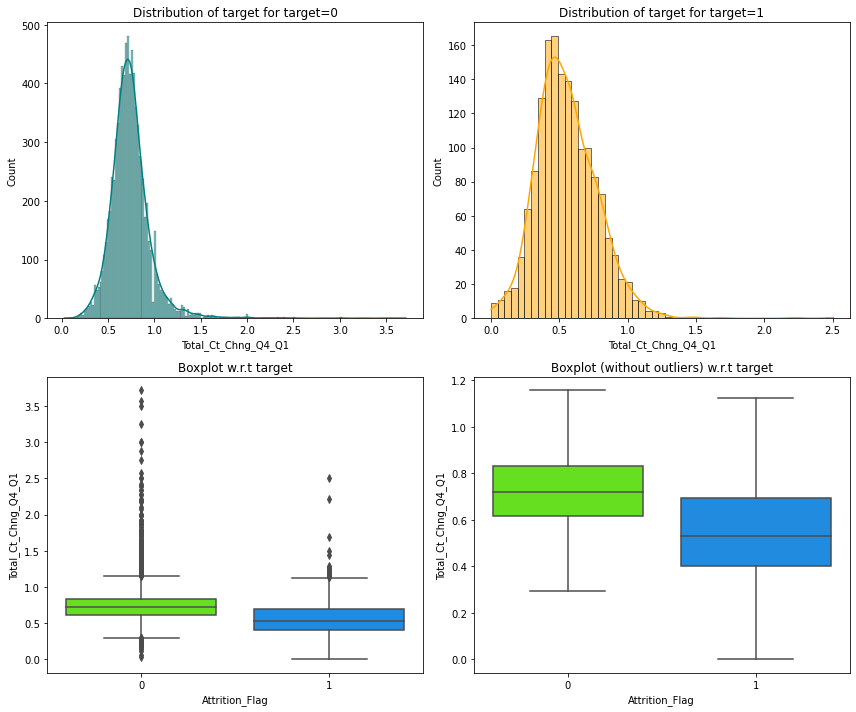

<IPython.core.display.Javascript object>

In [623]:
distribution_plot_wrt_target(data, 'Total_Ct_Chng_Q4_Q1', 'Attrition_Flag')

`Avg_Utilization_Ratio` vs `Attrition_Flag`

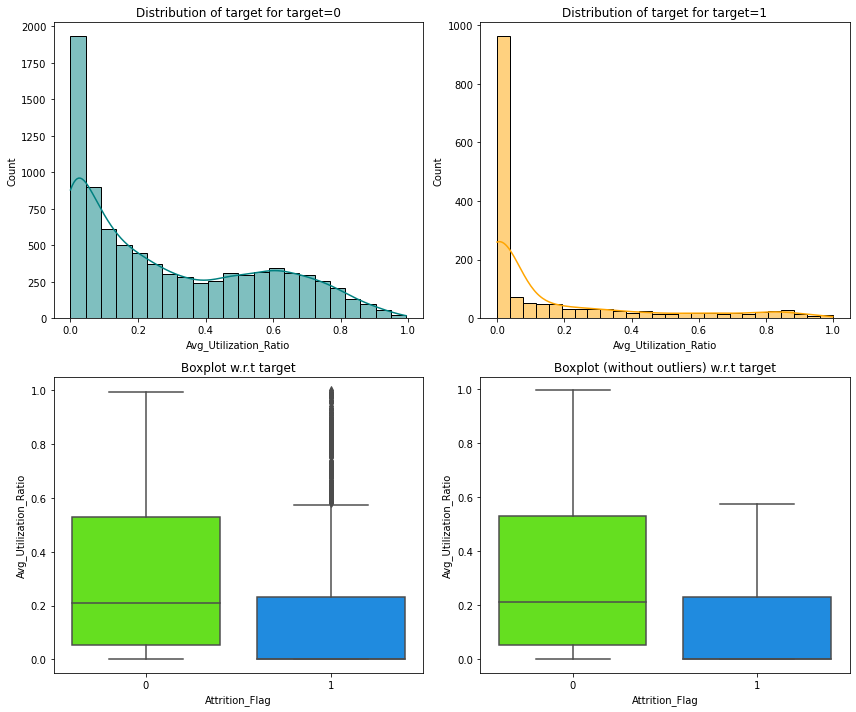

<IPython.core.display.Javascript object>

In [624]:
distribution_plot_wrt_target(data, 'Avg_Utilization_Ratio', 'Attrition_Flag')


`Attrition_Flag vs Months_on_book`

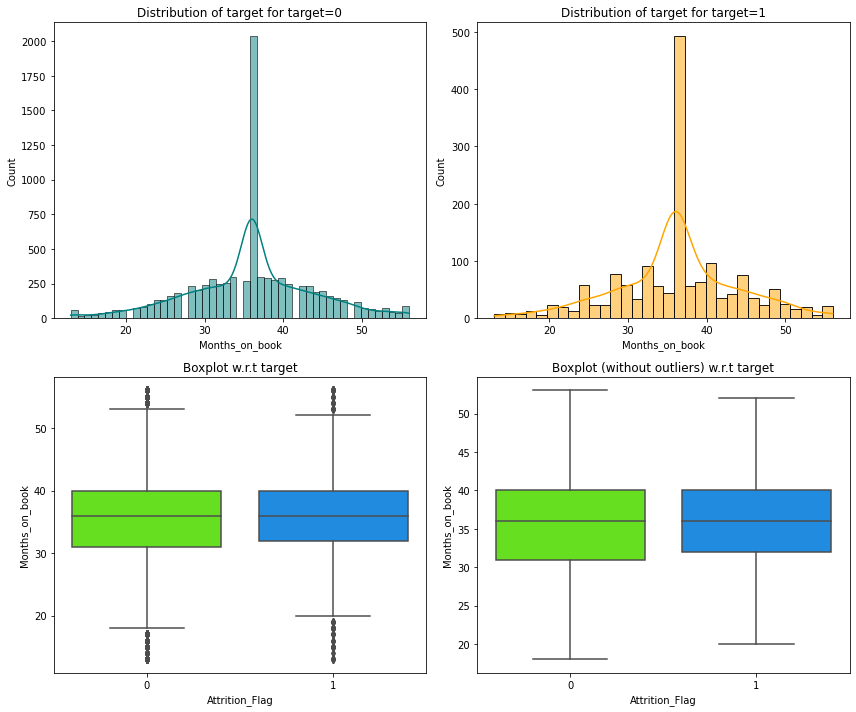

<IPython.core.display.Javascript object>

In [625]:
distribution_plot_wrt_target(data, 'Months_on_book', 'Attrition_Flag')

`Attrition_Flag vs Total_Revolving_Bal`

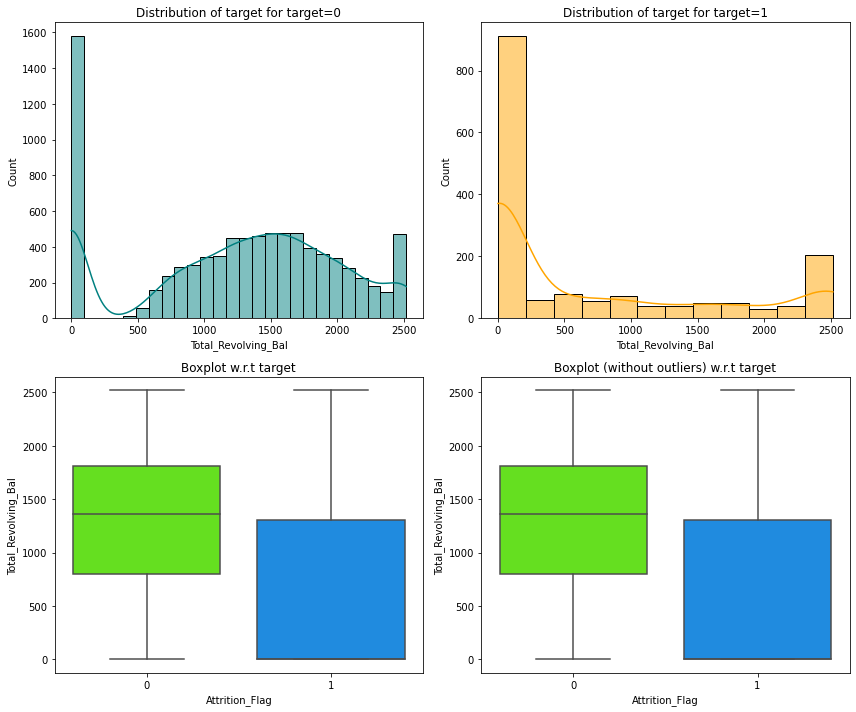

<IPython.core.display.Javascript object>

In [626]:
distribution_plot_wrt_target(data, 'Total_Revolving_Bal', 'Attrition_Flag')

`Attrition_Flag vs Avg_Open_To_Buy`

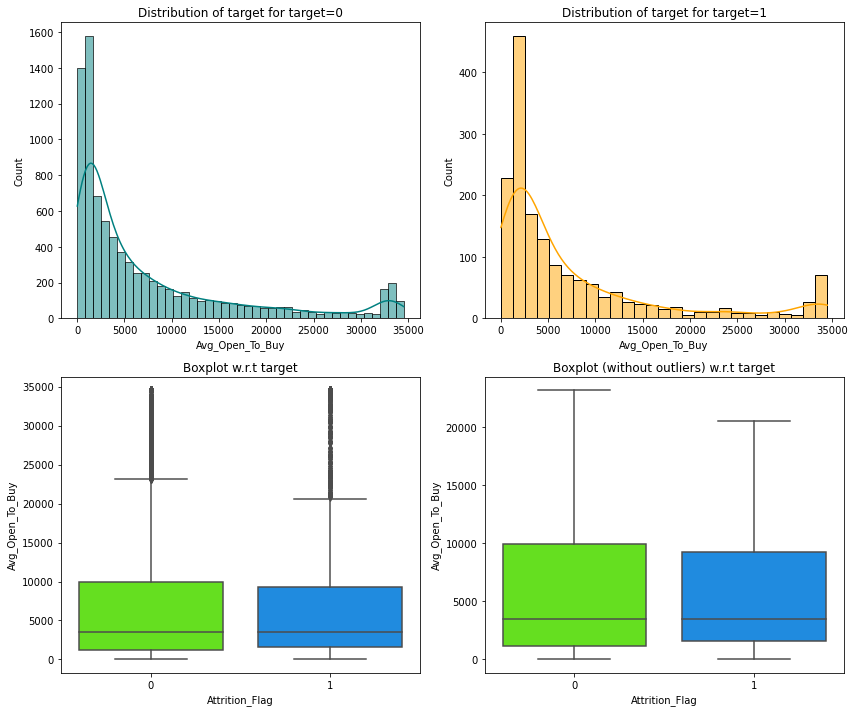

<IPython.core.display.Javascript object>

In [627]:
distribution_plot_wrt_target(data, 'Avg_Open_To_Buy', 'Attrition_Flag')

## Data Preprocessing

### Outlier Detection

In [628]:
Q1 = data.quantile(0.25)  # To find the 25th percentile
Q3 = data.quantile(0.75)  # To find the 75th percentile

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)

<IPython.core.display.Javascript object>

In [629]:
# checking the % outliers
((data.select_dtypes(include=["float64", "int64"]) < lower) | (data.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(data) * 100

Attrition_Flag             16.066
Customer_Age                0.020
Dependent_count             0.000
Months_on_book              3.812
Total_Relationship_Count    0.000
Months_Inactive_12_mon      3.268
Contacts_Count_12_mon       6.211
Credit_Limit                9.717
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             9.509
Total_Amt_Chng_Q4_Q1        3.910
Total_Trans_Amt             8.848
Total_Trans_Ct              0.020
Total_Ct_Chng_Q4_Q1         3.891
Avg_Utilization_Ratio       0.000
dtype: float64

<IPython.core.display.Javascript object>

### Train-Test Split

In [630]:
# creating the copy of the dataframe
data1 = data.copy()

<IPython.core.display.Javascript object>

In [631]:
data1["Income_Category"].replace("abc", np.nan, inplace=True)

<IPython.core.display.Javascript object>

In [632]:
# Print all unique values of "Income_Category"
unique_values = data["Income_Category"].unique()
unique_values

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'abc'], dtype=object)

<IPython.core.display.Javascript object>

In [633]:
data1.isna().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

<IPython.core.display.Javascript object>

In [634]:
# creating an instace of the imputer to be used
imputer = SimpleImputer(strategy="most_frequent")

<IPython.core.display.Javascript object>

In [635]:
# Dividing train data into X and y

X = data1.drop(["Attrition_Flag"], axis=1)
y = data1["Attrition_Flag"]

<IPython.core.display.Javascript object>

In [636]:
# Splitting data into training and validation set:

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print(X_train.shape, X_val.shape, X_test.shape)

(8101, 19) (1013, 19) (1013, 19)


<IPython.core.display.Javascript object>

### Missing value imputation

In [637]:
reqd_col_for_impute = ["Education_Level", "Marital_Status", "Income_Category"]

<IPython.core.display.Javascript object>

In [638]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the validation data
X_val[reqd_col_for_impute] = imputer.transform(X_val[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])

<IPython.core.display.Javascript object>

In [639]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

<IPython.core.display.Javascript object>

In [640]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

F    4279
M    3822
Name: Gender, dtype: int64
******************************
Graduate         3733
High School      1619
Uneducated       1171
College           816
Post-Graduate     407
Doctorate         355
Name: Education_Level, dtype: int64
******************************
Married     4346
Single      3144
Divorced     611
Name: Marital_Status, dtype: int64
******************************
Less than $40K    3701
$40K - $60K       1453
$80K - $120K      1237
$60K - $80K       1122
$120K +            588
Name: Income_Category, dtype: int64
******************************
Blue        7557
Silver       436
Gold          93
Platinum      15
Name: Card_Category, dtype: int64
******************************


<IPython.core.display.Javascript object>

In [641]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

F    551
M    462
Name: Gender, dtype: int64
******************************
Graduate         467
High School      201
Uneducated       157
College          102
Post-Graduate     47
Doctorate         39
Name: Education_Level, dtype: int64
******************************
Married     562
Single      378
Divorced     73
Name: Marital_Status, dtype: int64
******************************
Less than $40K    498
$40K - $60K       167
$80K - $120K      148
$60K - $80K       131
$120K +            69
Name: Income_Category, dtype: int64
******************************
Blue        933
Silver       68
Gold          8
Platinum      4
Name: Card_Category, dtype: int64
******************************


<IPython.core.display.Javascript object>

In [642]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

F    4279
M    3822
Name: Gender, dtype: int64
******************************
Graduate         3733
High School      1619
Uneducated       1171
College           816
Post-Graduate     407
Doctorate         355
Name: Education_Level, dtype: int64
******************************
Married     4346
Single      3144
Divorced     611
Name: Marital_Status, dtype: int64
******************************
Less than $40K    3701
$40K - $60K       1453
$80K - $120K      1237
$60K - $80K       1122
$120K +            588
Name: Income_Category, dtype: int64
******************************
Blue        7557
Silver       436
Gold          93
Platinum      15
Name: Card_Category, dtype: int64
******************************


<IPython.core.display.Javascript object>

### Encoding categorical variables

In [643]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(8101, 29) (1013, 29) (1013, 29)


<IPython.core.display.Javascript object>

* After encoding there are 29 columns.

In [644]:
# check the top 5 rows from the train dataset
X_train.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
9066,54,1,36,1,3,3,3723.000,1728,1995.000,0.595,8554,99,0.678,0.464,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
5814,58,4,48,1,4,3,5396.000,1803,3593.000,0.493,2107,39,0.393,0.334,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
792,45,4,36,6,1,3,15987.000,1648,14339.000,0.732,1436,36,1.250,0.103,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0
1791,34,2,36,4,3,4,3625.000,2517,1108.000,1.158,2616,46,1.300,0.694,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
5011,49,2,39,5,3,4,2720.000,1926,794.000,0.602,3806,61,0.794,0.708,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0


<IPython.core.display.Javascript object>

## Model Building

### Model evaluation criterion

Model can make wrong predictions as:

- Predicting a customer will attrite and the customer doesn't attrite
- Predicting a customer will not attrite and the customer attrites

Which case is more important?

- Predicting that customer will not attrite but he attrites i.e. losing on a valuable customer or asset.

**How to reduce this loss i.e need to reduce False Negatives??**

- Bank would want Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the bank can retain their valuable customers by identifying the customers who are at risk of attrition.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [645]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [646]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Model Building - Original Data

In [647]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss')))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.98
Random forest: 1.0
AdaBoost: 0.8707692307692307
Gradient Boosting: 0.8938461538461538
XGBoost: 1.0

Validation Performance:

Bagging: 0.8064516129032258
Random forest: 0.7741935483870968
AdaBoost: 0.8129032258064516
Gradient Boosting: 0.8387096774193549
XGBoost: 0.864516129032258


<IPython.core.display.Javascript object>

### Model Building - Oversampled Data

In [648]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 1300
Before Oversampling, counts of label 'No': 6801 

After Oversampling, counts of label 'Yes': 6801
After Oversampling, counts of label 'No': 6801 

After Oversampling, the shape of train_X: (13602, 29)
After Oversampling, the shape of train_y: (13602,) 



<IPython.core.display.Javascript object>

In [649]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9979414791942361
Random forest: 1.0
AdaBoost: 0.9702984855168357
Gradient Boosting: 0.979120717541538
XGBoost: 1.0

Validation Performance:

Bagging: 0.864516129032258
Random forest: 0.832258064516129
AdaBoost: 0.8838709677419355
Gradient Boosting: 0.8903225806451613
XGBoost: 0.9161290322580645


<IPython.core.display.Javascript object>

### Model Building - Undersampled Data

In [650]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

In [651]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 1300
Before Under Sampling, counts of label 'No': 6801 

After Under Sampling, counts of label 'Yes': 1300
After Under Sampling, counts of label 'No': 1300 

After Under Sampling, the shape of train_X: (2600, 29)
After Under Sampling, the shape of train_y: (2600,) 



<IPython.core.display.Javascript object>

In [652]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9938461538461538
Random forest: 1.0
AdaBoost: 0.9538461538461539
Gradient Boosting: 0.9792307692307692
XGBoost: 1.0

Validation Performance:

Bagging: 0.9032258064516129
Random forest: 0.9290322580645162
AdaBoost: 0.9096774193548387
Gradient Boosting: 0.9548387096774194
XGBoost: 0.9548387096774194


<IPython.core.display.Javascript object>

### Hyperparameter Tuning

#### **Note**
1. Sample parameter grid has been provided to do necessary hyperparameter tuning. One can extend/reduce the parameter grid based on execution time and system configuration to try to improve the model performance further wherever needed.
2. The models chosen in this notebook are based on test runs. One can update the best models as obtained upon code execution and tune them for best performance.



#### Tuning AdaBoost using original data

In [653]:
from sklearn import metrics

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.8938461538461538:


<IPython.core.display.Javascript object>

In [654]:
# Creating new pipeline with best parameters
tuned_ada2 = AdaBoostClassifier(random_state=1,
    n_estimators=randomized_cv.best_params_['n_estimators'], 
    learning_rate=randomized_cv.best_params_['learning_rate'], 
    base_estimator=randomized_cv.best_params_['base_estimator']
)

tuned_ada2.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=1, random_state=1)

<IPython.core.display.Javascript object>

In [655]:
# Check the performance on training set
adb2_train = model_performance_classification_sklearn(tuned_ada2, X_train, y_train)
print("Training performance:")
print(adb2_train)

Training performance:
   Accuracy  Recall  Precision    F1
0     0.986   0.945      0.965 0.955


<IPython.core.display.Javascript object>

In [656]:
adb2_val = model_performance_classification_sklearn(tuned_ada2, X_val, y_val)
print("Validation performance:")
print(adb2_val)

Validation performance:
   Accuracy  Recall  Precision    F1
0     0.952   0.813      0.863 0.837


<IPython.core.display.Javascript object>

#### Tuning Gradient Boosting using undersampled data

In [657]:
# Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.96:


<IPython.core.display.Javascript object>

In [658]:
# Creating new pipeline with best parameters
tuned_gbm1 = GradientBoostingClassifier(
    max_features=randomized_cv.best_params_['max_features'],
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    learning_rate=randomized_cv.best_params_['learning_rate'],
    n_estimators=randomized_cv.best_params_['n_estimators'],
    subsample=randomized_cv.best_params_['subsample'],
)

tuned_gbm1.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.5, random_state=1,
                           subsample=0.7)

<IPython.core.display.Javascript object>

In [659]:
gbm1_train = model_performance_classification_sklearn(tuned_gbm1, X_train_un, y_train_un)
print("Training performance:")
print(gbm1_train)

Training performance:
   Accuracy  Recall  Precision    F1
0     0.990   0.992      0.989 0.990


<IPython.core.display.Javascript object>

In [660]:
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
print("Validation performance:")
print(gbm1_val)

Validation performance:
   Accuracy  Recall  Precision    F1
0     0.948   0.942      0.768 0.846


<IPython.core.display.Javascript object>

#### Tuning Gradient Boosting using original data

In [661]:
#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8792307692307691:


<IPython.core.display.Javascript object>

In [662]:
# Creating new pipeline with best parameters
tuned_gbm2 = GradientBoostingClassifier(
    max_features=randomized_cv.best_params_['max_features'],
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    learning_rate=randomized_cv.best_params_['learning_rate'],
    n_estimators=randomized_cv.best_params_['n_estimators'],
    subsample=randomized_cv.best_params_['subsample'],
)

tuned_gbm2.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.7,
                           n_estimators=125, random_state=1, subsample=0.7)

<IPython.core.display.Javascript object>

In [663]:
# Check the performance on the oversampled train set
gbm2_train = model_performance_classification_sklearn(tuned_gbm2, X_train, y_train)
print("Training performance:")
print(gbm2_train)

Training performance:
   Accuracy  Recall  Precision    F1
0     0.989   0.953      0.978 0.965


<IPython.core.display.Javascript object>

In [664]:
# Check the performance on the validation set
gbm2_val = model_performance_classification_sklearn(tuned_gbm2, X_val, y_val)
print("Validation performance:")
print(gbm2_val)

Validation performance:
   Accuracy  Recall  Precision    F1
0     0.962   0.865      0.882 0.873


<IPython.core.display.Javascript object>

#### Tuning XGBoost Model with Original data

In [665]:
# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,300,50),'scale_pos_weight':[0,1,2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05], 'gamma':[0,1,3,5],
            'subsample':[0.7,0.8,0.9,1]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.01, 'gamma': 1} with CV score=0.9523076923076923:


<IPython.core.display.Javascript object>

In [666]:
tuned_xgb = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=randomized_cv.best_params_['subsample'],
    scale_pos_weight=randomized_cv.best_params_['scale_pos_weight'],
    n_estimators=randomized_cv.best_params_['n_estimators'],
    learning_rate=randomized_cv.best_params_['learning_rate'],
    gamma=1,
)

tuned_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=1, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

<IPython.core.display.Javascript object>

In [667]:
xgb_train = model_performance_classification_sklearn(tuned_xgb, X_train, y_train)
print(xgb_train)

   Accuracy  Recall  Precision    F1
0     0.944   0.998      0.742 0.851


<IPython.core.display.Javascript object>

In [668]:
xgb_val = model_performance_classification_sklearn(tuned_xgb, X_val, y_val) 
print("Validation performance:")
print(xgb_val)

Validation performance:
   Accuracy  Recall  Precision    F1
0     0.922   0.929      0.679 0.785


<IPython.core.display.Javascript object>

## Model Comparison and Final Model Selection

**Note**: If you want to include XGBoost model for final model selection, you need to add **xgb_train.T** in the training performance comparison list and **xgb_val.T** in the validation performance comparison list below.

In [669]:
# training performance comparison
models_train_comp_df = pd.concat(
    [
        gbm1_train.T,
        gbm2_train.T,
        adb2_train.T,
        xgb_train.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Original data",
    "AdaBoost trained with Undersampled data",
    "XGBoost Model trained with Original data"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Original data,AdaBoost trained with Undersampled data,XGBoost Model trained with Original data
Accuracy,0.990,0.989,0.986,0.944
Recall,0.992,0.953,0.945,0.998
Precision,0.989,0.978,0.965,0.742
F1,0.990,0.965,0.955,0.851


<IPython.core.display.Javascript object>

In [670]:
# validation performance comparison
models_val_comp_df = pd.concat(
    [
        gbm1_val.T,
        gbm2_val.T,
        adb2_val.T,
        xgb_train.T

    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Original data",
    "AdaBoost trained with Undersampled data",
    "XGBoost Model trained with Original data"
]
print("Validation performance comparison:")
print(models_val_comp_df)

Validation performance comparison:
           Gradient boosting trained with Undersampled data  \
Accuracy                                              0.948   
Recall                                                0.942   
Precision                                             0.768   
F1                                                    0.846   

           Gradient boosting trained with Original data  \
Accuracy                                          0.962   
Recall                                            0.865   
Precision                                         0.882   
F1                                                0.873   

           AdaBoost trained with Undersampled data  \
Accuracy                                     0.952   
Recall                                       0.813   
Precision                                    0.863   
F1                                           0.837   

           XGBoost Model trained with Original data  
Accuracy                    

<IPython.core.display.Javascript object>

**Now we have our final model, so let's find out how our final model is performing on unseen test data.**

In [671]:
# Let's check the performance on test set
test_performance = model_performance_classification_sklearn(tuned_xgb, X_test, y_test) 
print("Test performance:")
print(test_performance)

Test performance:
   Accuracy  Recall  Precision    F1
0     0.921   0.971      0.690 0.807


<IPython.core.display.Javascript object>

### Feature Importances

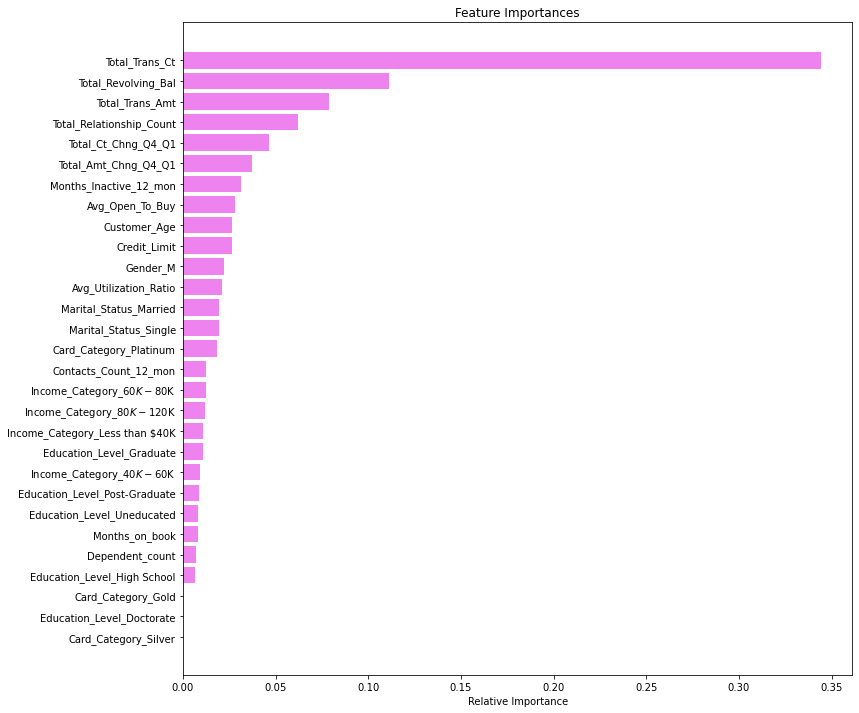

<IPython.core.display.Javascript object>

In [672]:
feature_names = X_train.columns
importances = tuned_xgb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Business Insights and Conclusions


After analyzing the performance of the various models, we can conclude the following:

Gradient Boosting Model trained with Undersampled data: This model performs well on the training set, showing high accuracy, recall, and precision. However, the validation performance decreases, especially in precision. This model might be overfitting the training data and may not generalize well to unseen data.

Gradient Boosting Model trained with Original data: This model shows slightly lower performance on the training set compared to the first model but performs better on the validation set, especially in precision. This model seems to generalize better to unseen data.

AdaBoost Model trained with Undersampled data: This model's performance is similar to the first model's performance. It achieves high scores on the training set but drops in performance on the validation set, indicating possible overfitting.

XGBoost Model trained with Original data: This model has the highest recall but the lowest precision on both the training and validation sets. This model might be good at identifying positive cases (churned customers) but could generate many false positives.

From the perspective of the Thera bank, a model with high recall is desirable because it allows us to capture as many churned customers as possible. However, precision is also crucial because a low precision model will identify many non-churned customers as churned, leading to unnecessary efforts to retain them.

Based on the performance metrics, Gradient Boosting Model trained with Original data appears to provide a good balance between recall and precision and generalizes better to unseen data.

Feature importance analysis indicates that the most critical factors contributing to customer churn include transaction count, revolving balance, transaction amount, and the number of products or relationships with the bank. These insights align with the common understanding that customer engagement and satisfaction are key to retaining customers.

In conclusion, Thera Bank can use the Gradient Boosting Model trained with Original data to identify potential churn customers. The bank should focus on improving customer engagement, possibly through incentives for transactions, maintaining good relationships with customers, and personalizing services based on customer needs and preferences. It should also monitor customers showing signs of disengagement, such as a decrease in transaction count, and intervene early to retain them.


***